# IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

# Read DATASET 

In [2]:
df_0 = pd.read_csv("/kaggle/input/nslkdd/KDDTrain+.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


**-->There are some outlier values**

# DATA CLEANING

In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
def unique_values(df, columns, show_values=True, show_counts=True, summary_only=False):
  
    
    for column_name in columns:
        print(f"\nColumn: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()

        if summary_only:
            print(f"Unique Values Count: {len(unique_vals)}\n{'='*40}")
        else:
            if show_values:
                print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
            if show_counts:
                print(f"Value Counts:\n{value_counts}\n{'='*40}")


In [9]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)


Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859


**--->Further analysis of these columns and their impact on attacks will be explored in the EDA-Visualization section.**

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(125972, 43)

<Figure size 2000x4000 with 0 Axes>

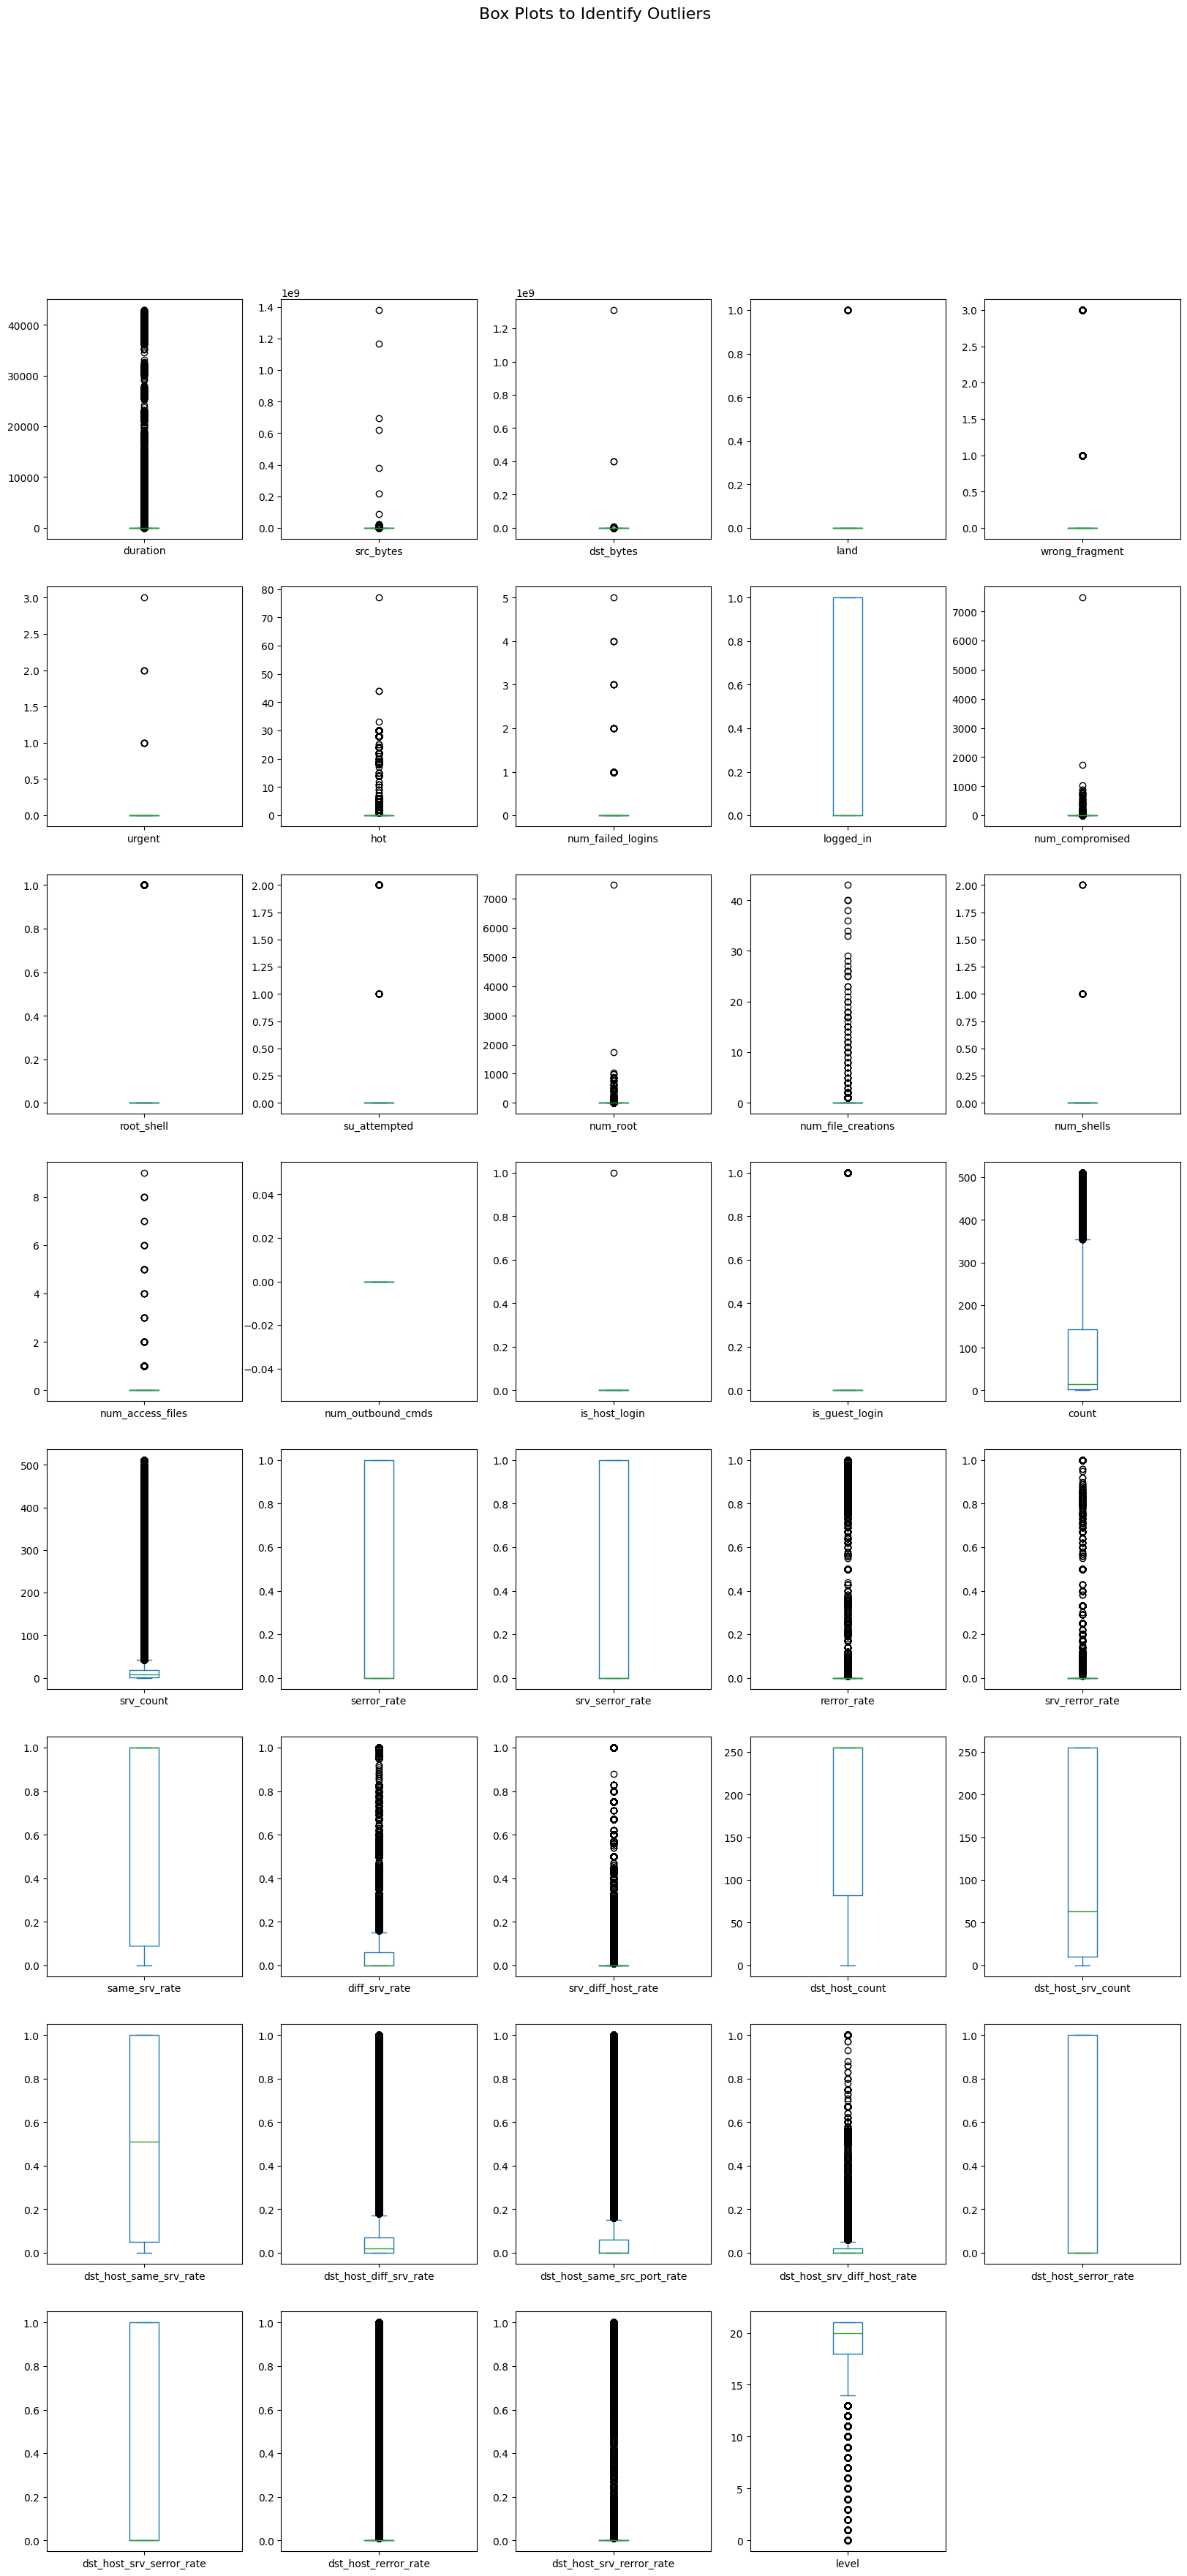

In [12]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40), sharex=False, sharey=False)
plt.suptitle('Box Plots to Identify Outliers', fontsize=16)
plt.show()


**--->There aren't enough outliers to significantly mislead the model, so I will not drop them.**

In [13]:
# Classify Whether an Attack Occurred
df['attack'] = ['normal' if i == 'normal' else 'attack' for i in df['attack']]


In [14]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

#  EXPLORATORY DATA ANALYSIS (EDA) - VISUALIZATIONS

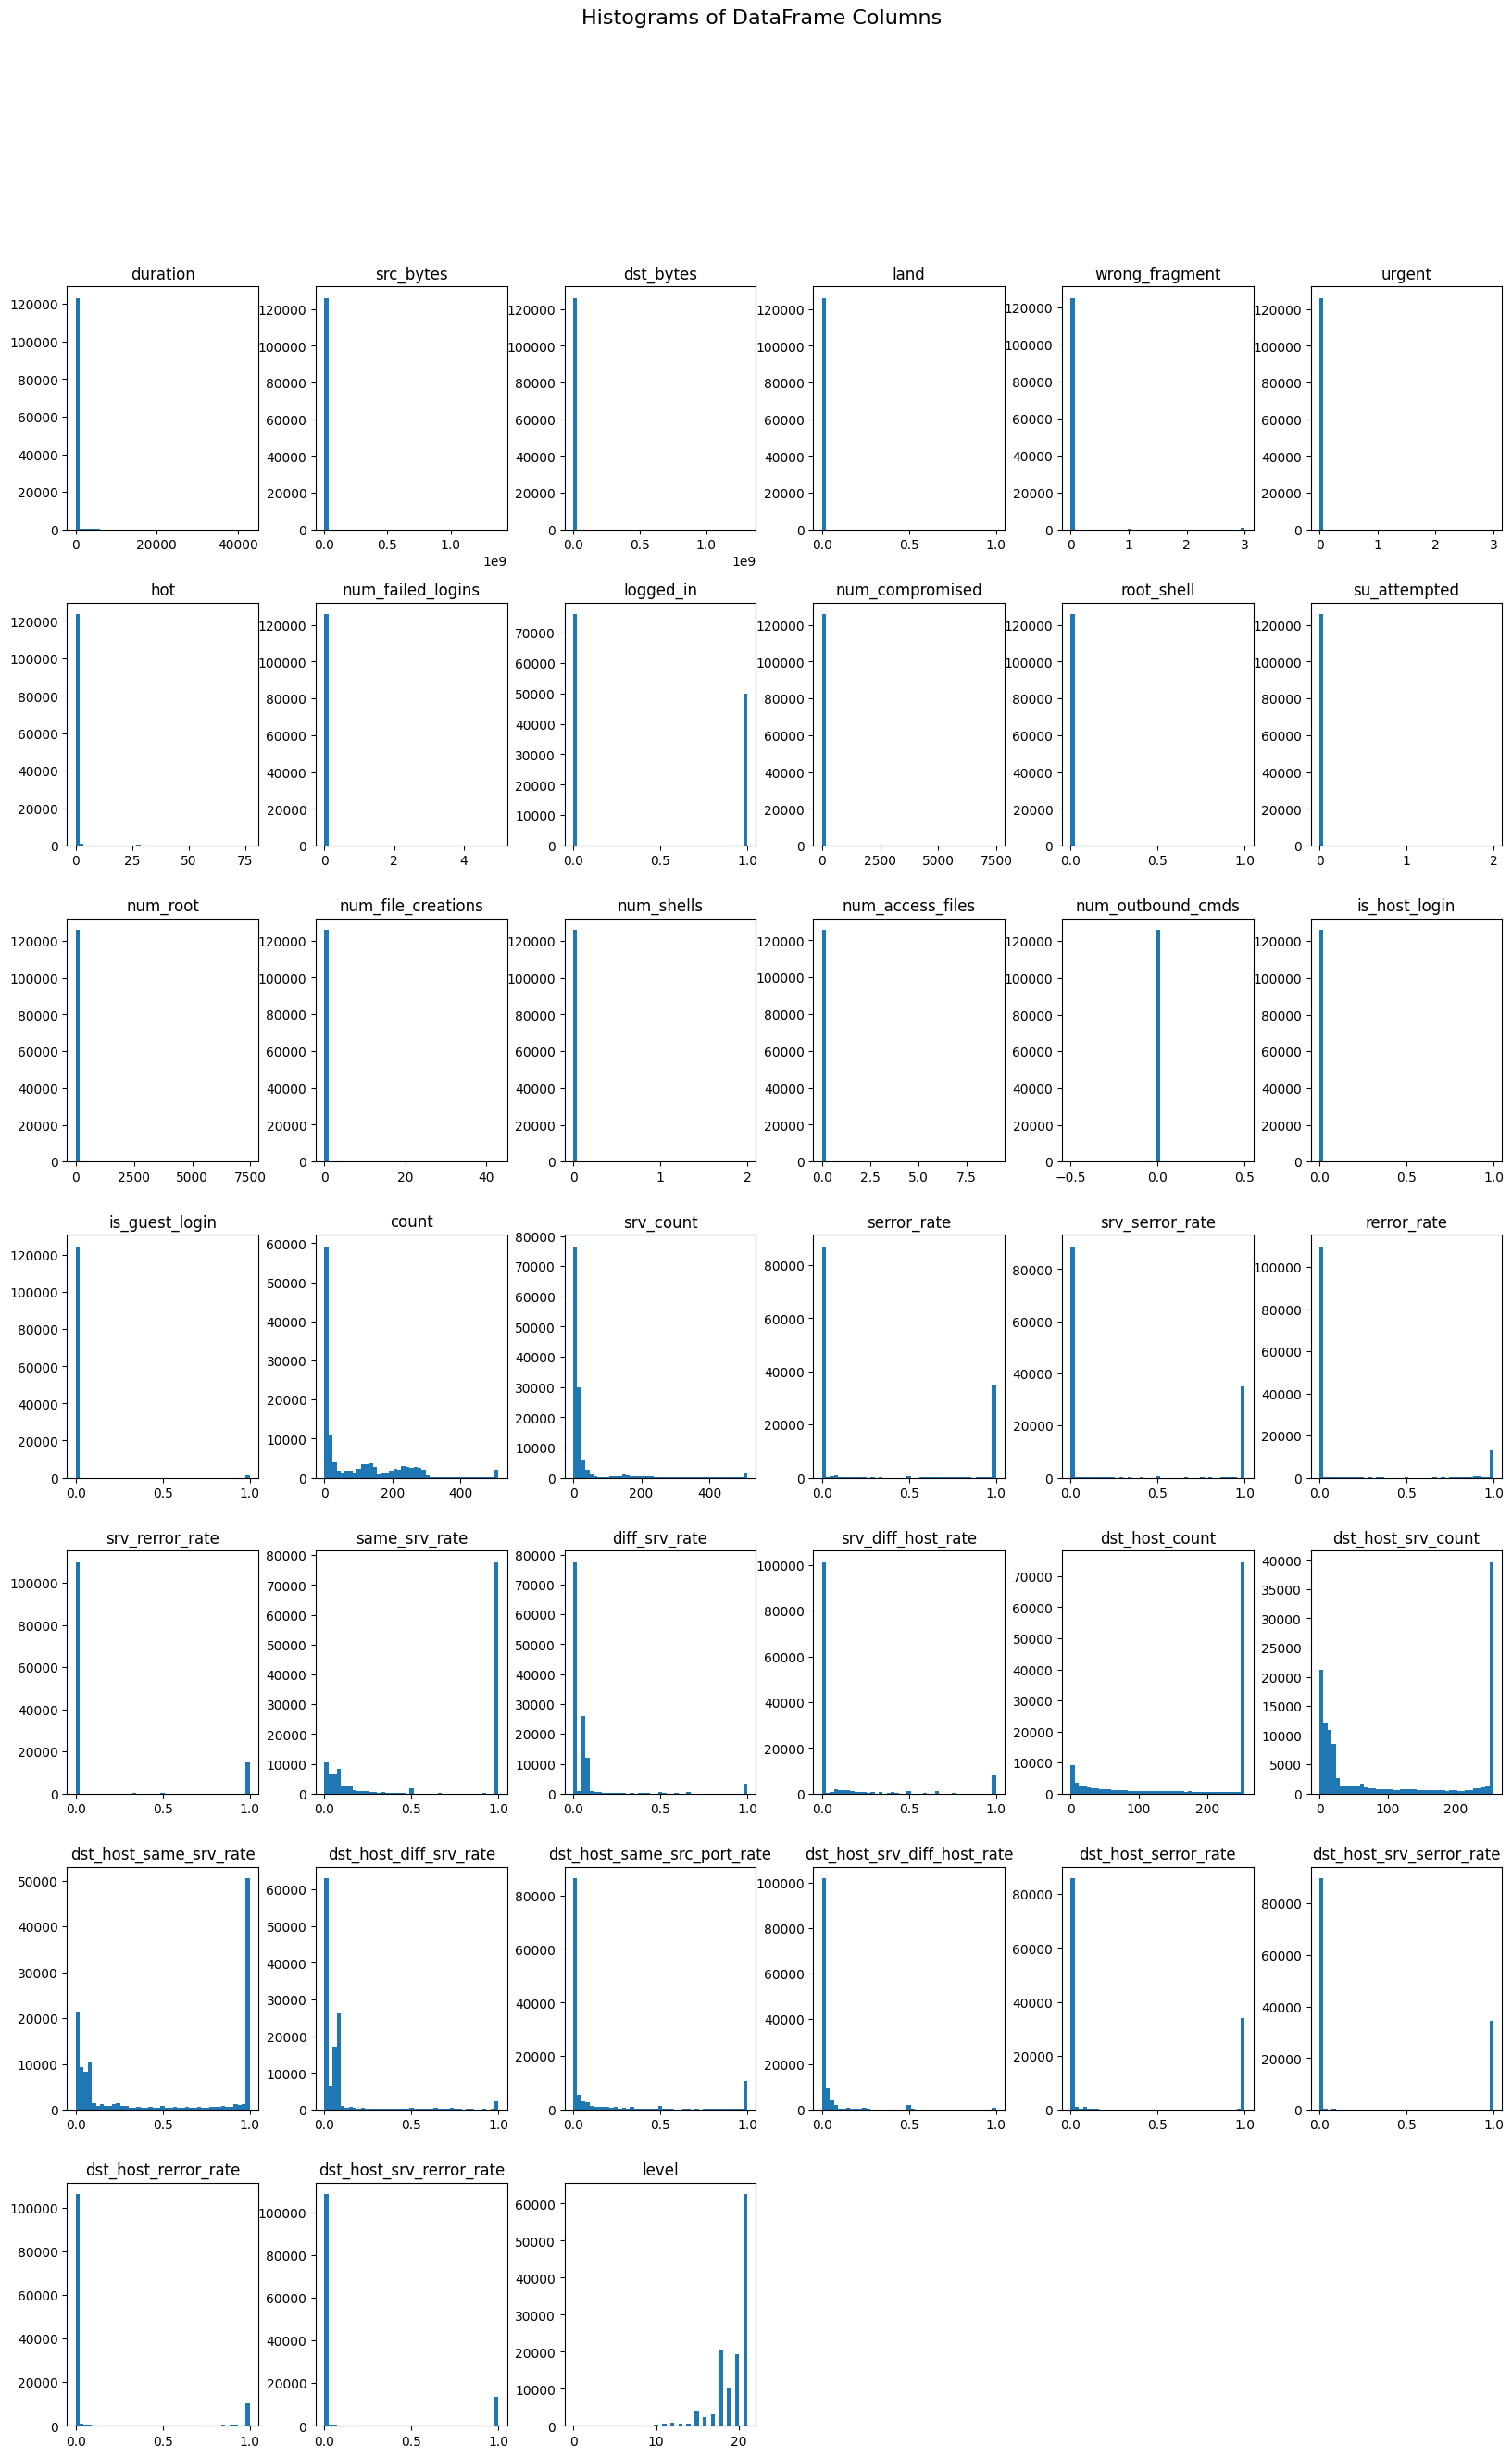

In [15]:
# Generate histograms for all columns in the DataFrame
df.hist(bins=43, figsize=(20, 30), grid=False)

# Add a title and show the plots
plt.suptitle('Histograms of DataFrame Columns', fontsize=16)
plt.show()

General visualization in order to get insights

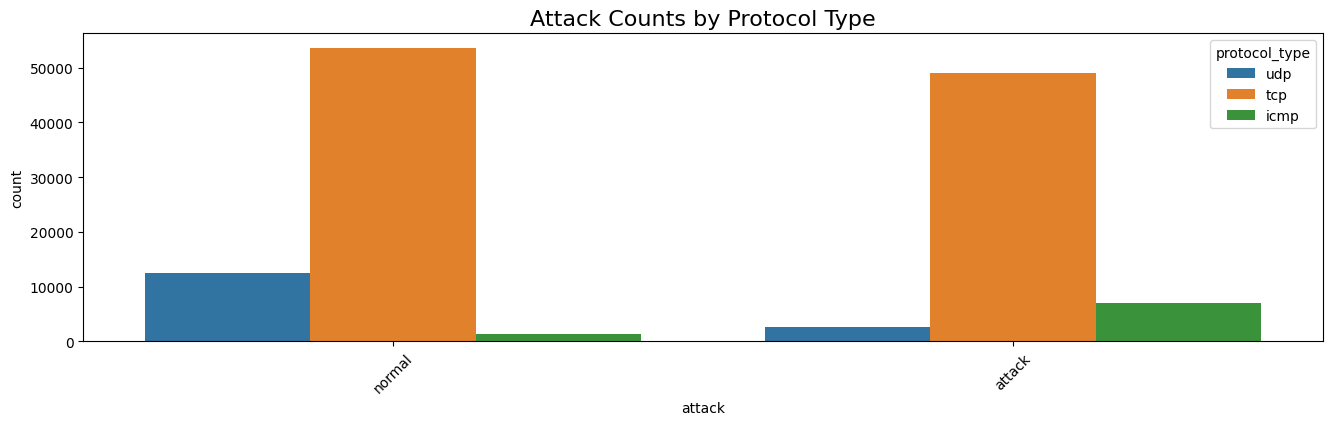

In [16]:
# Plot attack counts over protocol types
plt.figure(figsize=(16, 4))
sns.countplot(x='attack', data=df, hue='protocol_type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title and adjust font size
plt.title('Attack Counts by Protocol Type', fontsize=16)

# Display the plot
plt.show()

# Observation:
**The majority of attacks are from TCP, followed by UDP, with ICMP being the least frequent source of attacks.**


In [17]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

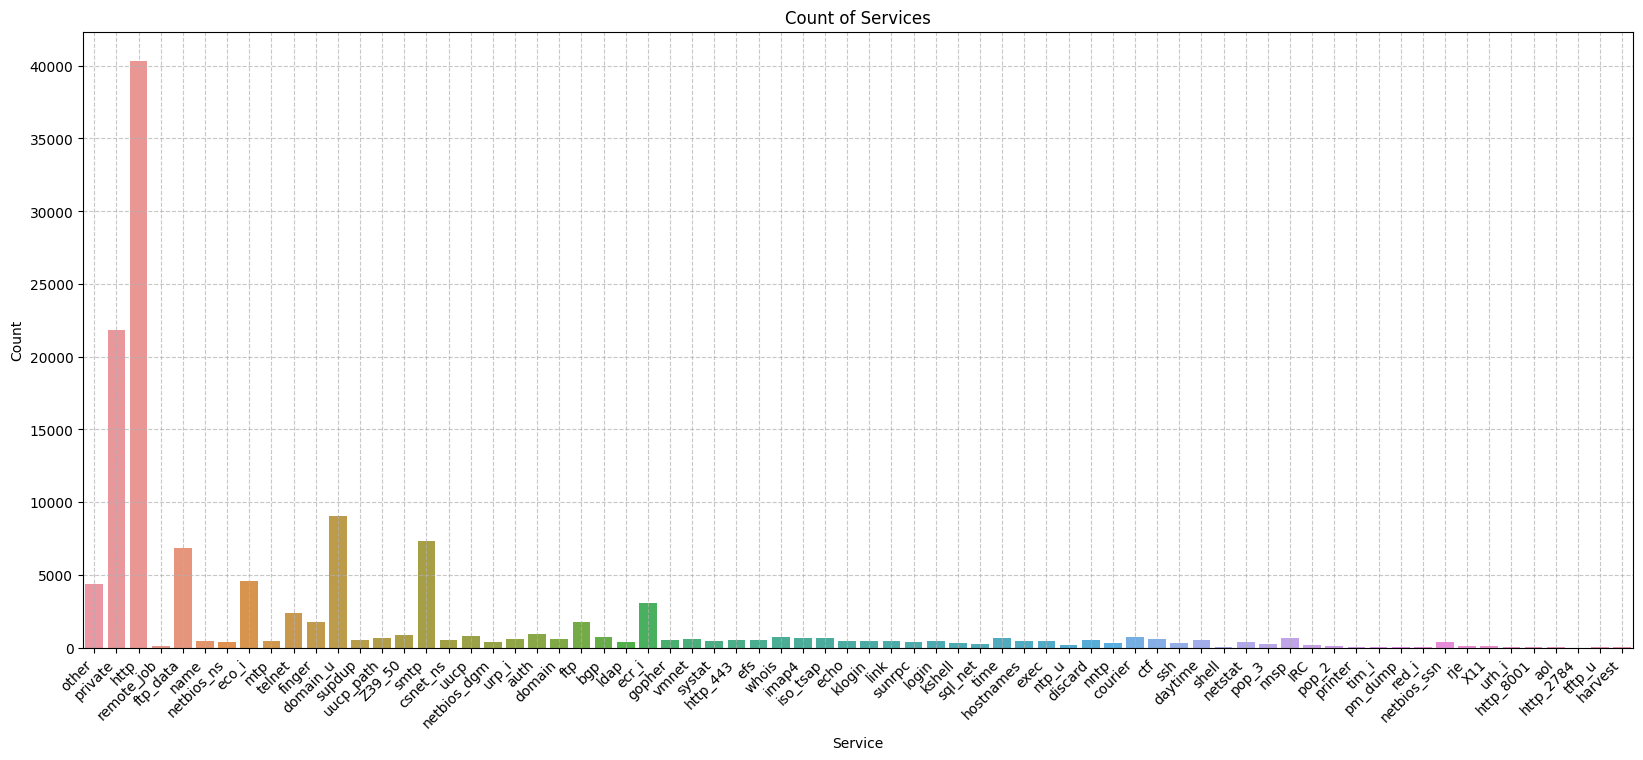

In [18]:

#Service used general
# Set up the figure size
plt.figure(figsize=(20, 8))

# Create a count plot for the 'service' column
ax = sns.countplot(x='service', data=df)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Add labels and title
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')

# Optionally, add grid lines for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


 **---> The most commonly used services are: HTTP, private, domain_u, SMTP, FTP, and others.**

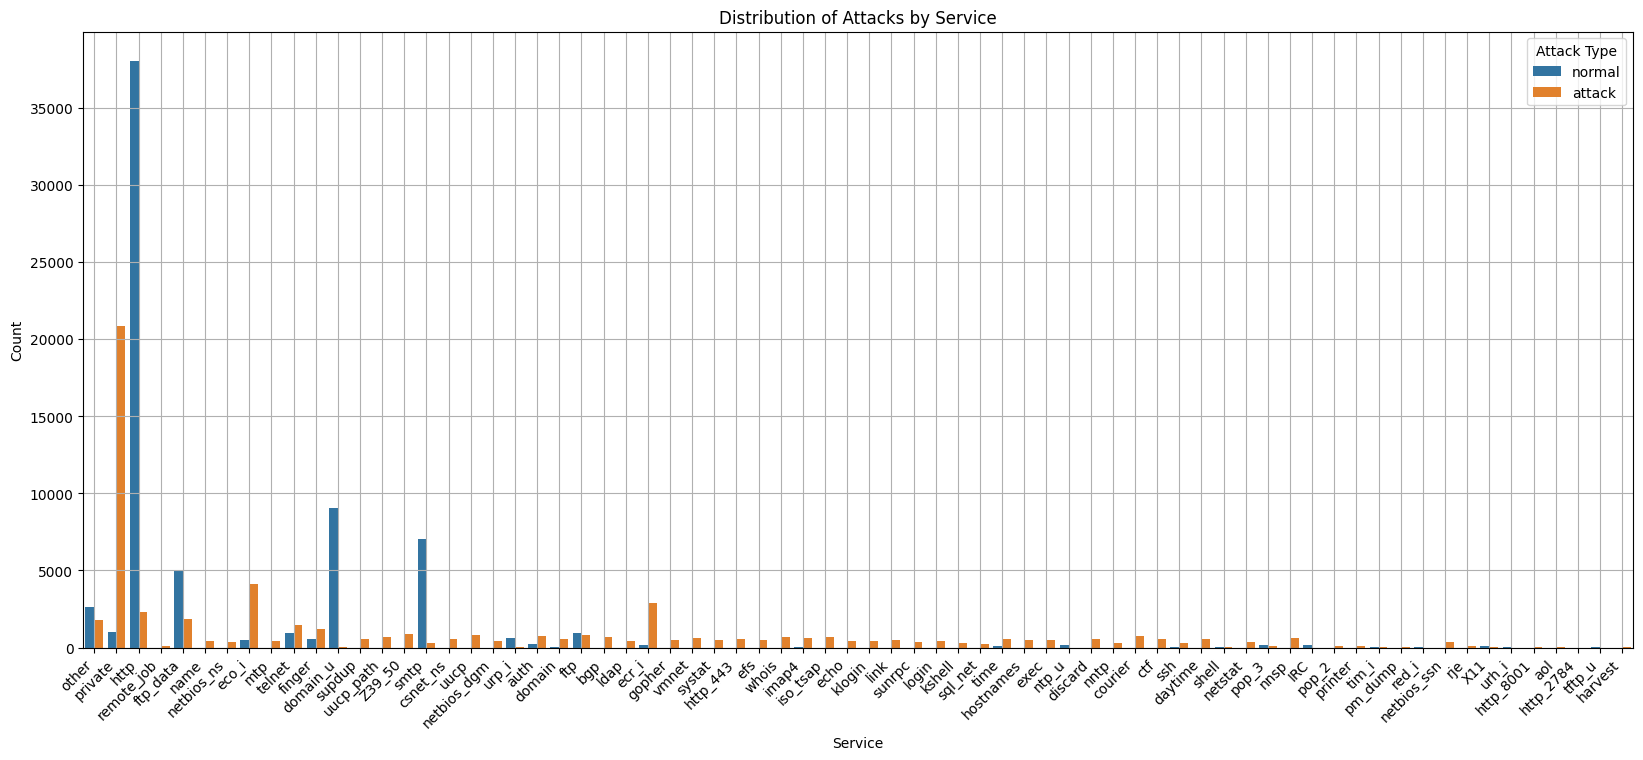

In [19]:
# 4.3 Service used effect on attacks
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


**--->private attacks are the most common service**

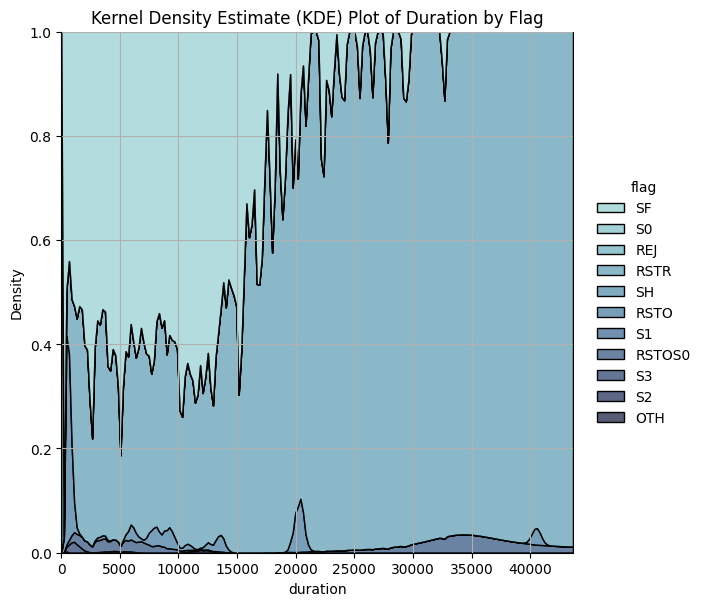

In [20]:
# Kernel Density Estimate (KDE) Plot of Duration by Flag
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75"
)

# Add title and grid
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)

# Show the plot
plt.show()

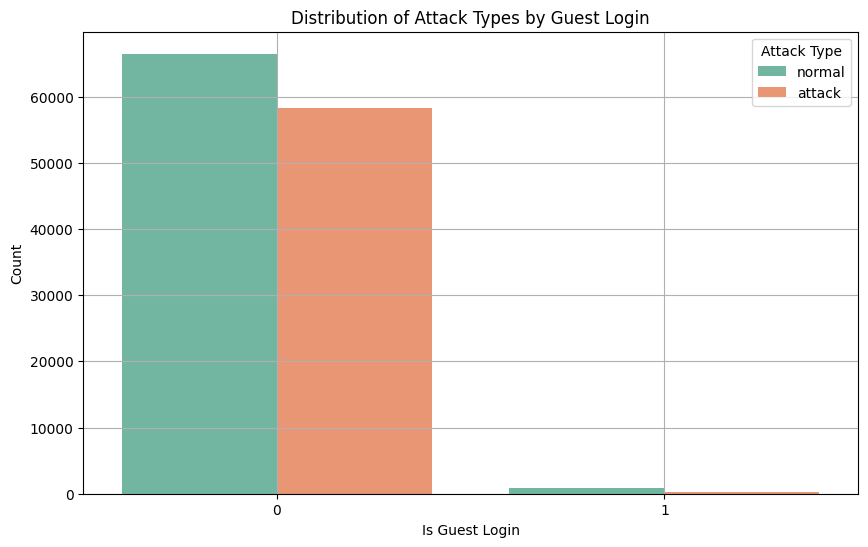

In [21]:
# Distribution of Attack Types by Guest Login
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

**--->It is evident that attacks predominantly occur when the guest is not logged in.**


# PREPROCESSING

In [22]:
# Identify categorical features in the DataFrame
cat_features = df.select_dtypes(include='object').columns

# Display the list of categorical features
print("Categorical Features:")
print(cat_features)


Categorical Features:
Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')


In [23]:
from sklearn import preprocessing

# Initialize the LabelEncoder
le = preprocessing.LabelEncoder()

# List of columns to encode
clm = ['protocol_type', 'service', 'flag', 'attack']

# Apply LabelEncoder to each specified column
for x in clm:
    df[x] = le.fit_transform(df[x])

# Display the first few rows to verify encoding
print(df.head())


   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              2       44     9        146          0     0   
1         0              1       49     5          0          0     0   
2         0              1       24     9        232       8153     0   
3         0              1       24     9        199        420     0   
4         0              1       49     1          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                   0.000   
1               0       0    0  ...                   0.100   
2               0       0    0  ...                   1.000   
3               0       0    0  ...                   1.000   
4               0       0    0  ...                   0.070   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                   0.600                        0.880   
1                   0.050                        0.000   
2       

# TRAIN AND TEST SPLIT

In [24]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(["attack"], axis=1)  # Features
y = df["attack"]                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,        # 10% of the data will be used for testing
    random_state=43       # Ensure reproducibility of the split
)

# Display the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (113374, 42)
Testing set shape: (12598, 42)


In [25]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

# Feature Engineering

In [26]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information between features and the target variable
mutual_info = mutual_info_classif(X_train, y_train)

# Convert mutual information to a pandas Series for better handling
mutual_info_series = pd.Series(mutual_info, index=X_train.columns)

# Sort the mutual information values in descending order
sorted_mutual_info = mutual_info_series.sort_values(ascending=False)

# Display the sorted mutual information values
print("Mutual Information between Features and Target:")
print(sorted_mutual_info)


Mutual Information between Features and Target:
src_bytes                     0.567
service                       0.468
dst_bytes                     0.442
flag                          0.367
same_srv_rate                 0.365
diff_srv_rate                 0.361
dst_host_srv_count            0.334
dst_host_same_srv_rate        0.309
logged_in                     0.290
dst_host_serror_rate          0.287
dst_host_diff_srv_rate        0.286
dst_host_srv_serror_rate      0.283
serror_rate                   0.276
srv_serror_rate               0.270
count                         0.263
dst_host_srv_diff_host_rate   0.187
level                         0.153
dst_host_count                0.142
dst_host_same_src_port_rate   0.133
srv_diff_host_rate            0.097
dst_host_srv_rerror_rate      0.064
srv_count                     0.064
protocol_type                 0.054
rerror_rate                   0.040
srv_rerror_rate               0.036
dst_host_rerror_rate          0.036
duration        

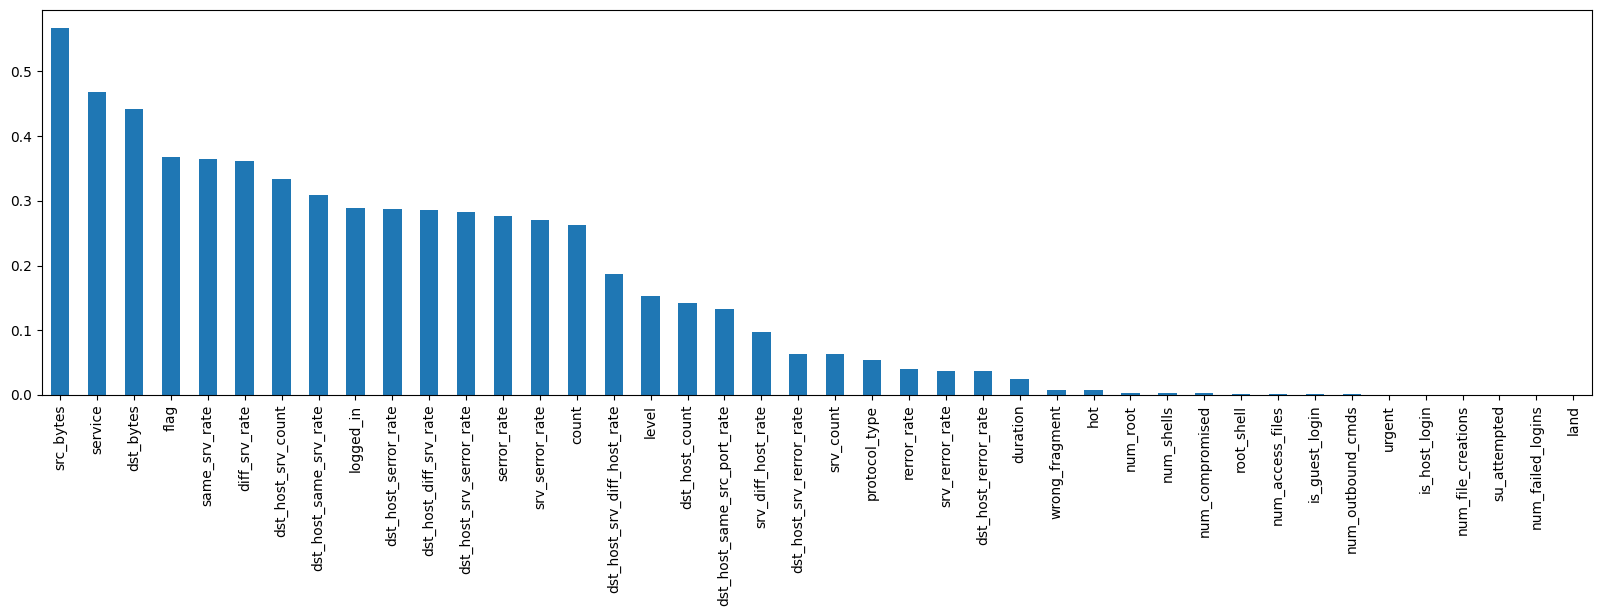

In [27]:
sorted_mutual_info.plot.bar(figsize=(20, 5));

# Feature Selection

In [28]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [29]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because the dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

# Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

# MODEL BUILD

In [31]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [32]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [33]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [34]:
Logistic = Logistic_model.fit(X_train,y_train)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

def eval_metric(model, X_train, y_train, X_test, y_test):
   
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # Evaluate on the test set
    print("Test Set Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Evaluate on the training set
    print("\nTrain Set Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
    print("\nClassification Report:\n", classification_report(y_train, y_train_pred))


In [37]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test Set Evaluation:
Confusion Matrix:
 [[5421  407]
 [ 233 6537]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      5828
           1       0.94      0.97      0.95      6770

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598


Train Set Evaluation:
Confusion Matrix:
 [[49317  3485]
 [ 2141 58431]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     52802
           1       0.94      0.96      0.95     60572

    accuracy                           0.95    113374
   macro avg       0.95      0.95      0.95    113374
weighted avg       0.95      0.95      0.95    113374



In [38]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test Set Evaluation:
Confusion Matrix:
 [[5816   12]
 [   8 6762]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train Set Evaluation:
Confusion Matrix:
 [[52746    56]
 [   29 60543]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52802
           1       1.00      1.00      1.00     60572

    accuracy                           1.00    113374
   macro avg       1.00      1.00      1.00    113374
weighted avg       1.00      1.00      1.00    113374



# Observation:
**Ensemble methods such as XGBoost, AdaBoost, and Gradient Boosting generally achieve higher accuracy scores compared to logistic regression, especially with larger datasets.**

# HYPERPARAMETER TUNING

In [39]:
param_grid = {
    "n_estimators": [50, 64, 100, 128],            # Number of boosting rounds (trees) to build.
    "max_depth": [2, 3, 4, 5, 6],                  # Maximum depth of a tree, which controls the complexity of the model.
    "learning_rate": [0.01, 0.03, 0.05, 0.1],      # Step size shrinking to prevent overfitting; smaller values require more trees.
    "subsample": [0.5, 0.8],                       # Proportion of samples used for fitting the trees; helps with overfitting.
    "colsample_bytree": [0.5, 0.8]                 # Proportion of features used for each tree; helps with overfitting.
}


In [40]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #initialize the model

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [41]:
XGB_grid_model.best_score_

0.9983422219898579

In [42]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

# 6.2 FINAL MODEL

In [43]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# EVALUATION

In [44]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])


In [45]:
xgb_auc

0.99997736694144

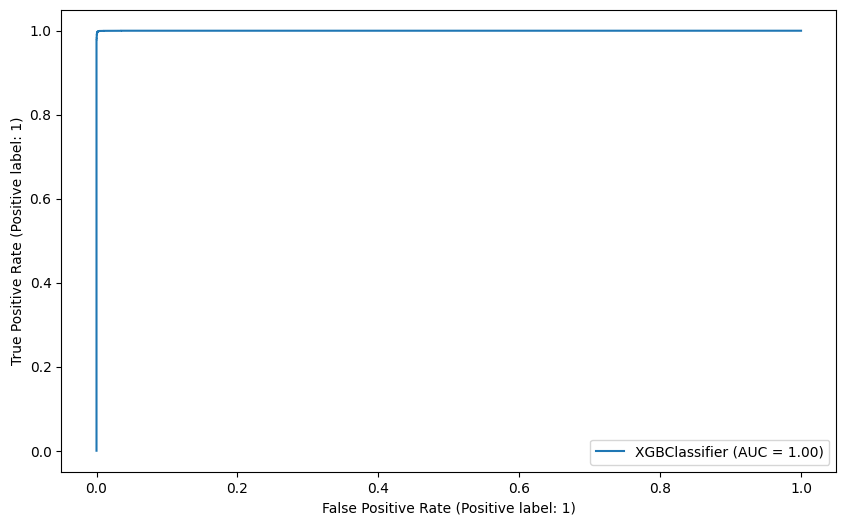

In [46]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);

In [47]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test Set Evaluation:
Confusion Matrix:
 [[5809   19]
 [   6 6764]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train Set Evaluation:
Confusion Matrix:
 [[52694   108]
 [   41 60531]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52802
           1       1.00      1.00      1.00     60572

    accuracy                           1.00    113374
   macro avg       1.00      1.00      1.00    113374
weighted avg       1.00      1.00      1.00    113374



# FEATURE IMPORTANCE

In [48]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
logged_in,0.227
src_bytes,0.169
protocol_type,0.149
flag,0.104
dst_bytes,0.090
count,0.050
serror_rate,0.037
wrong_fragment,0.037
service,0.030
hot,0.027


In [49]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [50]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'normal', 'attack', ..., 'normal', 'normal', 'attack'],
      dtype=object)

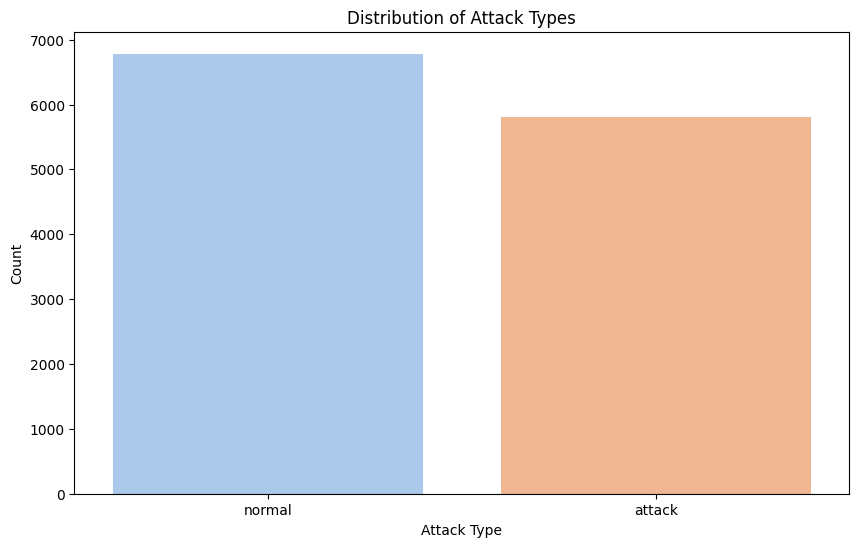

In [51]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()